<a href="https://colab.research.google.com/github/Ch0ro/ML-DL/blob/master/BreamAndSmelt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 생선 분류 문제01
#### 도미(Bream)와 빙어(Smelt) 소량데이터 분류

In [ ]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


**전체 데이터 df에서 도미(Bream)와 빙어(Smelt) 데이터 분류**

In [ ]:
data_Bream = df[df['Species']=='Bream']
bream_length = data_Bream['Length2']
bream_weigth = data_Bream['Weight']

In [ ]:
data_Smelt = df[df['Species']=='Smelt']
smelt_length = data_Smelt['Length2']
smelt_weigth = data_Smelt['Weight']

### 산점도(Scatter Plot)
##### x축 길이, y축 무게



In [ ]:
import matplotlib.pyplot as plt

**도미 데이터 산점도**

<function matplotlib.pyplot.show>

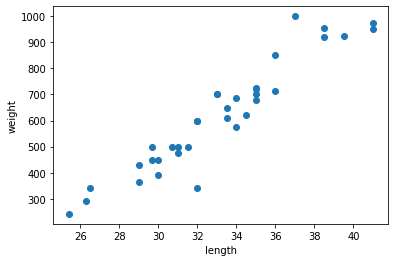

In [ ]:
plt.scatter(bream_length,bream_weigth)
plt.xlabel('length')
plt.ylabel('weight')
plt.show



*   도미의 길이가 커질수록 무게 역시 증가하는 추세를 보이고있다.
*   산점도 그래프가 양의 선형을 띄고있다. 



**빙어 데이터 산점도**

<function matplotlib.pyplot.show>

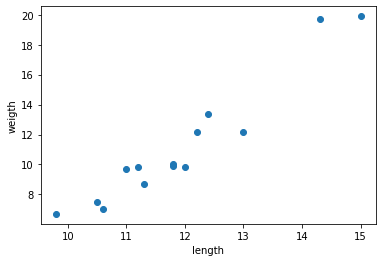

In [ ]:
plt.scatter(smelt_length,smelt_weigth)
plt.xlabel('length')
plt.ylabel('weigth')
plt.show

**도미 + 빙어 산점도**

<function matplotlib.pyplot.show>

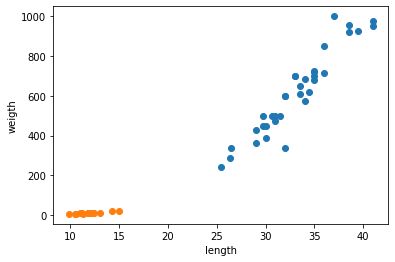

In [ ]:
plt.scatter(bream_length,bream_weigth)
plt.scatter(smelt_length,smelt_weigth)
plt.xlabel('length')
plt.ylabel('weigth')
plt.show



*   빙어는 도미에 비해 표본의 개수가 너무 적고, 길이에 따른 무게의 변화가 크지 않다.
*   선형적이라고 생각할 수 있지만, 변화가 크지 않아 빙어의 경우 길이와 무게의 상관도가 적다고 판단하겠다.



### K-최근접 이웃 알고리즘을 활용한 생선 분류

In [ ]:
length = list(bream_length) + list(smelt_length)
weigth = list(bream_weigth) + list(smelt_weigth)
# 도미와 빙어 각각의 lenght와 weight 시리즈들을 2차원 리스트로 만듦
fish_data = [[l,w] for l,w in zip(length,weigth)]
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

**정답 데이터(target data) 도미 - 1 , 빙어 - 0 으로 생성**
>
**35개(도미 수)의 1과 14개(방어 수)의 0으로 구성**

In [ ]:
fish_target = [1]*35 + [0]*14
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
# k-최근접 이웃 알고리즘 구현을 위한 사이킷런 패키지 임포트
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kn = KNeighborsClassifier()
kn.fit(fish_data,fish_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
kn.score(fish_data,fish_target)

1.0

In [ ]:
kn.predict([[30,600]])

array([1])



*   score는 정확도를 뜻하며 범위는 0~1이다.
*   1에 가까울 수록 정확도 100%라는 뜻인데, 이 모델의 경우 정확도 100%를 보여주고 있다.
*   predict는 새로운 값을 대입했을 때, 어느 집단에 속할지 예측해주는 것이다.

*   길이 30, 무게 600에 대한 값은 1 즉, 도미로 예측하고있다.





---

## K-최근접 알고리즘 설명
##### 이 알고리즘은 기본적으로 데이터가 모두 준비되어 있어야 한다.
##### 데이터가 아주 많은 경우 이용하기 어렵다.
##### fit()메서드에 전달한 데이터를 모두 저장하고 있다가 새로운 데이터가 등장하면 가장 가까운 데이터를 참고하여 도미인지 빙어인지 구분한다.
##### 가까운 몇 개의 데이터를 참고할지는 정하기 나름이나, 기본값은 5이다.

*기본값을 데이터 전체 개수인 49로 바꿔보면?*

In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49) #kn49 모델 생성
kn49.fit(fish_data,fish_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                     weights='uniform')

In [ ]:
kn49.score(fish_data,fish_target) #kn49 모델의 정확도

0.7142857142857143

In [ ]:
kn49.predict([[30,600]])

array([1])



*   이전 모델(n_neighbors=5가 기본값인 모델)보다 정확도가 떨어진다.
*   이 값은 35/49(도미의 수 / 전체 생선 수) 값과 같다. 
*   주변 데이터 5개만 봤으면 5개 모두 도미 데이터라 정확도가 1이 나온 것!





---

# 생선 분류 문제02

## 훈련 세트와 테스트 세트

In [ ]:
fish_data # 해당 데이터 중 처음 35개를 훈련 셋, 나머지 14개를 테스트 셋으로 설정

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [ ]:
# 훈련 셋(학습 시킬 데이터)
train_input = fish_data[:35]
train_target = fish_target[:35]

# 테스트 셋(생성된 모델 검증 데이터)
test_input = fish_data[35:]
test_target = fish_target[35:]

In [ ]:
kn = kn.fit(train_input,train_target)

In [ ]:
kn.score(test_input,test_target)

0.0



*   train과 test를 나눌때 35개,14개로 나누었는데, 이렇게 나누면 도미와 빙어 데이터가 적절하게 섞이지 않아 데이터의 편향(샘플링 편향)이 발생한다.
*   이를 해결하기위해 무작위로 샘플을 고르는 방식으로 다시 데이터를 나누겠다.



## 샘플링 편향
**우선 2차원 리스트를 2차원 넘파이 배열로 변환**
###### 보통의 xy좌표계는 시작점이 왼쪽 아래이나 배열은 왼쪽 위부터 시작하여 고차원 배열을 다룰 때 편리하다.

In [ ]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

input_arr

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [ ]:
input_arr.shape #(샘플 수, 특성 수)

(49, 2)

In [ ]:
# 데이터의 인덱스를 무작위로 섞기
np.random.seed(42) #seed를 42로 고정
index = np.arange(49) #0부터 48까지 1씩 증가하는 배열 생성
np.random.shuffle(index) # 주어진 index를 무작위로 섞음

index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [ ]:
# 무작위로 섞인 인덱스로 데이터도 무작위로 섞기
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

## 산점도(Scatter Plot)

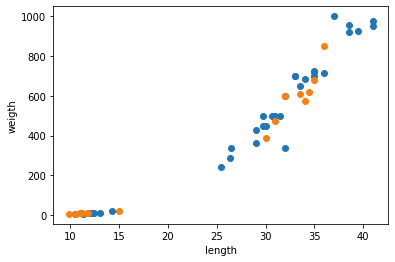

In [ ]:
plt.scatter(train_input[:,0],train_input[:,1]) # test셋에서 길이와 무게를 각각 x,y로 둠
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

*   파랑색 - 훈련 셋 / 주황색 - 테스트 셋
*   훈련 셋과 테스트 셋이 적절하게 섞여있는 것을 알 수 있다.

## K-최근접 알고리즘

In [ ]:
kn = kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

In [ ]:
kn.predict(test_input) # 예측값

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
test_target # 실제값

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

*   정확도 1 = 정확도 100%
*   예측값과 실제값이 일치하는 것을 볼 수 있다.


---

# 생선 분류 문제03
### 데이터 전처리로 오류값 바로잡기 (fish_data도 새로 생성)
##### 길이 25cm, 무게 150g 도미를 '빙어'라고 예측하는 오류가 발생
##### 데이터 전처리를 진행하지 않아서 발생하는 문제

In [ ]:
#column_stack() 함수는 리스트를 열기준으로 병합한 후 튜플로 반환한다. -> 튜플은 수정,삭제 등 불가
fish_data = np.column_stack((length,weigth))
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


## 넘파이로 데이터 준비하기

In [ ]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

## 훈련 세트와 테스트 세트
>
*사이킷런 사용*
*훈련 셋 35개 테스트 셋 13개로 나뉘어짐*

In [ ]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target = train_test_split(fish_data,fish_target,random_state=42)

In [ ]:
print(train_input.shape,test_input.shape)

(36, 2) (13, 2)


In [ ]:
print(train_target.shape,test_target.shape)

(36,) (13,)


In [ ]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]



*   test_target을 보면 데스트 셋 13개 중 빙어가 3마리 밖에 없다.
*   원래 도미:빙어 = 35:14 = 2.5:1 정도인데 test_target에서는 도미:빙어 = 3.3:1 정도이다.
*   샘플링 편향이 조금 나타다고 있으므로 골고루 다시 섞을 필요가있다.
*   stratify=fish_target을 추가해서 클래스 비율에 맞게 데이터를 나누도록 함

In [ ]:
train_input,test_input,train_target,test_target = train_test_split(fish_data,fish_target,stratify=fish_target,random_state=42)
print(test_target) # 도미:빙어 = 9:4 = 2.25:1 로 2.5:1과 얼추 비슷하게 맞춰짐

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

## 수상한 도미 한 마리

In [ ]:
kn.predict([[25,150]])

array([0.])

*   길이 25, 무게150인 생선을 0 즉, 도미가 아닌 빙어로 예측함

### 산점도(Scatter Plot)
##### 길이 25, 무게 150인 데이터의 위치를 확인

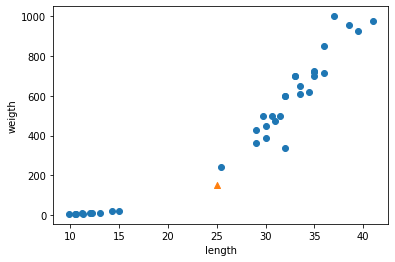

In [ ]:
plt.scatter(train_input[:,0],train_input[:,1]) 
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()



*   위치를 봤을 땐, 빙어보단 도미 데이터에 가깝다는 것을 알 수 있다.
*   클래스 이웃 개수를 기본값인 5로 설정하여 이와 같은 현상이 발생
*   길이25, 무게150인 도미에 근접한 5개의 값을 확인해보자




In [ ]:
distances, indexes = kn.kneighbors([[25,150]])

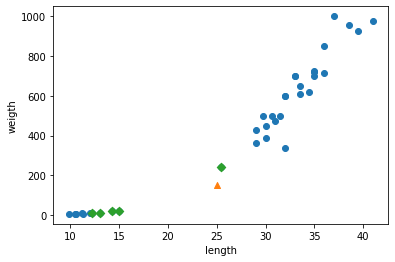

In [ ]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

In [ ]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [ ]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]




*   가장 가까운 이웃 5개(초로색 마름모) 중 도미는 1개만 추출되었다. 
*   따라서 이를 도미가 아닌 빙어로 판별하는 것이다.



## 기준을 맞춰라

In [ ]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]




*   distances와 그림을 비교해보자.
*   가장 가까운 도미와는 거리가 92고, 가장 가까운 빙어와의 거리는 130.5
*   근데 그림으로 봤을 때, 92와 130.5의 거리가 이상하다.

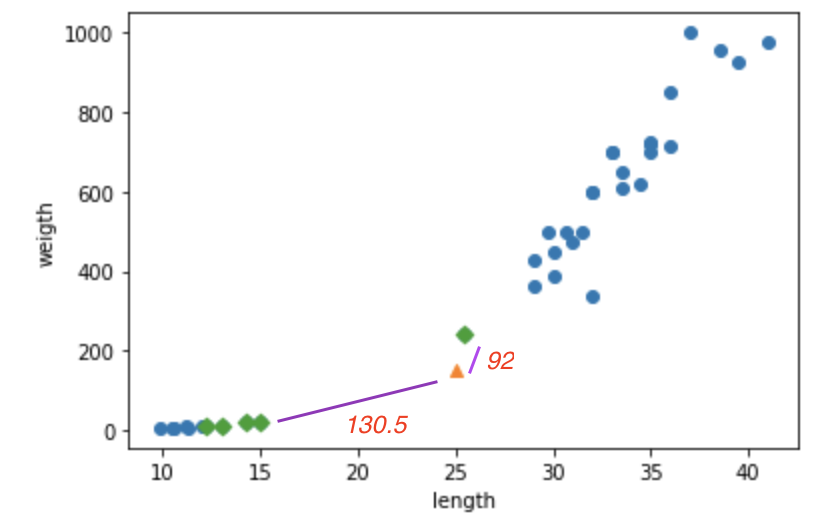
*   이는 x축은 범위가 좁고(10-40), y축은 범위가 넓어서(0-1000) 그런 것
*   그래서 y축으로 조금만 멀어져도 거리가 아주 큰 값으로 계산된다. 
*   x축과 y축의 범위를 동일하게 맞추어 샘플링 편향 문제를 해결하자







### 산점도(Scatter Plot)

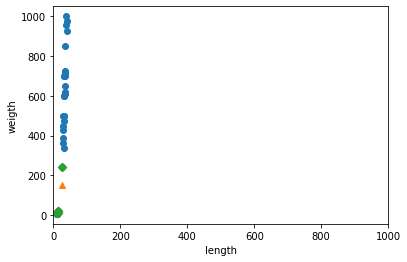

In [ ]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()



*   산점도가 거의 일직선으로 나타나는 것으로 보아, 생선의 길이(x축)는 가장 가까운 이웃을 찾는 데 크게 영향을 미치지 못한다.
*   오로지 생선의 무게(y축)만 고려 대상이 된다.
*   즉, 두 특성의 스케일(scale)이 다르다.




### 표준점수(Standard Score)

*표준점수를 기준으로 스케일 조정*

In [ ]:
mean = np.mean(train_input,axis=0) # 각각의 열 마다 mean(평균)산출
std = np.std(train_input,axis=0) # 각각의 열 마다 std(표준편차)산출

In [ ]:
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
train_scaled = (train_input - mean) / std # Z화(표준화)

## 전처리 데이터 모델 훈련하기

### 산점도(Scatter Plot)

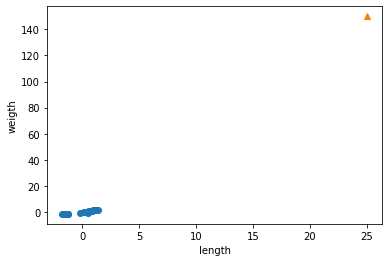

In [ ]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()



*   수상한 도미(25,150)를 동일한 비울로 변환하지 않아서 그래프가 이상함
*   수상한 도미도 Z화 하고 다시 산점도를 그려보자



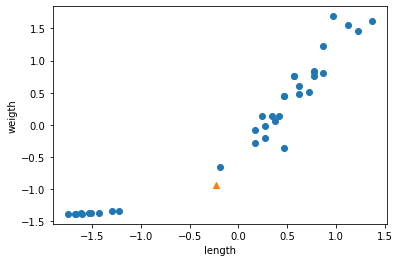

In [ ]:
new = ([25,150] - mean) / std
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()



*   그래프의 분포는 표준화 전과 비슷하나 x축과 y축의 범위가 (-1.5,1.5)로 바뀌었다는 것을 알 수 있다.
*   이 데이터셋으로 K-최근접 이웃 모델을 다시 훈련해보자



### K-최근접 알고리즘

In [ ]:
kn.fit(train_scaled,train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
test_scaled = (test_input - mean) / std # 테스트 세트도 Z화(표준화)진행 단, 테스트 세트의 평균과 표준편차 이용해야함

In [ ]:
kn.score(test_scaled,test_target)

1.0

In [ ]:
print(kn.predict([new]))

[1.]




*   스케일을 맞추고 모델을 적용했더니 정확도가 1이 나왔다.
*   수상한 도미도 도미라고 판별하였다.





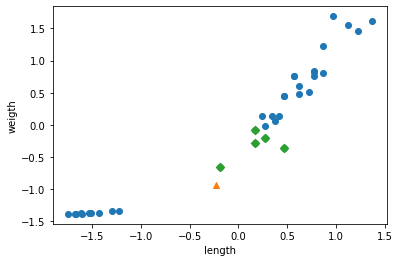

In [ ]:
distances,indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()



*   근접한 이웃도 도미 5개로 변한 것을 볼 수 있다.

